# Imports

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import numpy as np #for linear algebra
import pandas as pd #for data preprocessing
import warnings 
warnings.filterwarnings("ignore") # hide warnings
import matplotlib.pyplot as plt # graphs
import seaborn as sns # data visualisation
import pprint # pretty print library
%matplotlib inline 

In [15]:
#reading the dataset
df = pd.read_csv("/kaggle/input/hourly-energy-consumption/AEP_hourly.csv")
print("="*50)
print("First five rows ","\n")
print(df.head(5),"\n")

print("="*50)
print("Information about the dataset ","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ", "\n")
print(df.isnull().sum(),"\n")

First five rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0 

Information about the dataset  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



# Data Preprocessing

In [16]:
# Extract all Data Like Year Month Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(5)

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday


# Data Visualisation

Text(0.5, 1.0, 'Energy consumption according to year ')

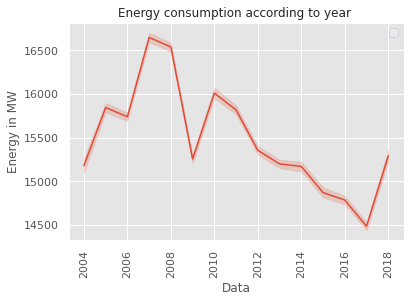

In [17]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=df["Year"], y=df["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(20,10)})

plt.title("Energy consumption in 2004")
plt.xlabel("Data")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)
    
plt.title("Energy consumption according to year ")

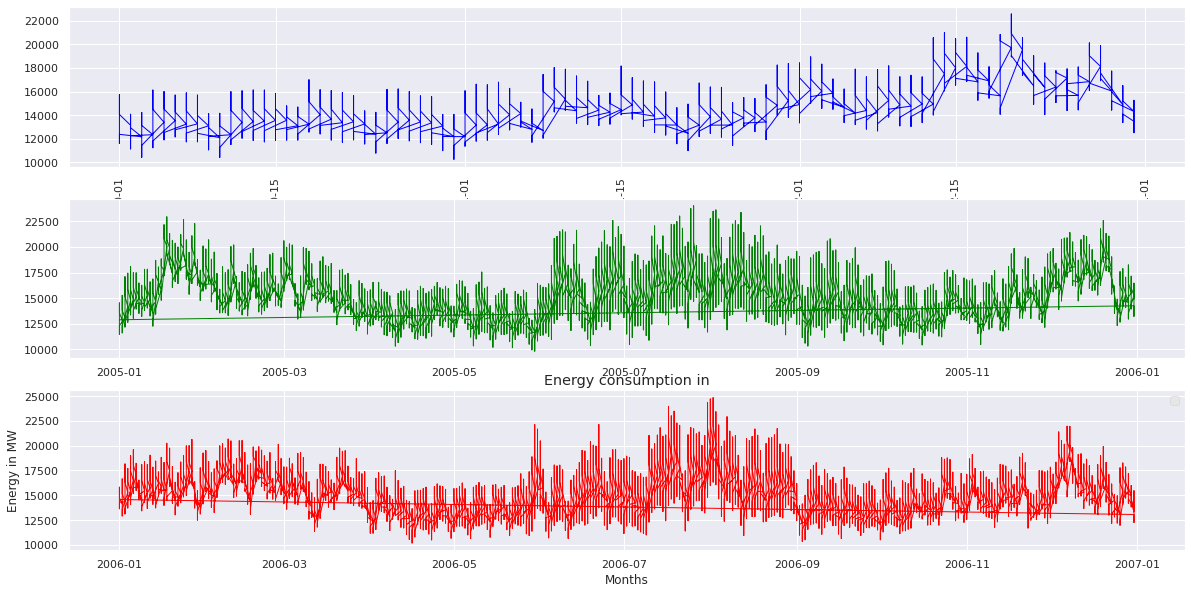

In [18]:
from matplotlib import style

fig = plt.figure()

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)


style.use('ggplot')

y_2004 = dataset.loc["2004"]["AEP_MW"].to_list()
x_2004 = dataset.loc["2004"]["Date"].to_list()
ax1.plot(x_2004, y_2004, color="blue", linewidth=1)

y_2005 = dataset.loc["2005"]["AEP_MW"].to_list()
x_2005 = dataset.loc["2005"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green",linewidth=1)

y_2006 = dataset.loc["2006"]["AEP_MW"].to_list()
x_2006 = dataset.loc["2006"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="red", linewidth=1)

plt.rcParams["figure.figsize"] = (20,10)
plt.title("Energy consumption in")
plt.xlabel("Months")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

Text(0.5, 1.0, 'Energy Distribution')

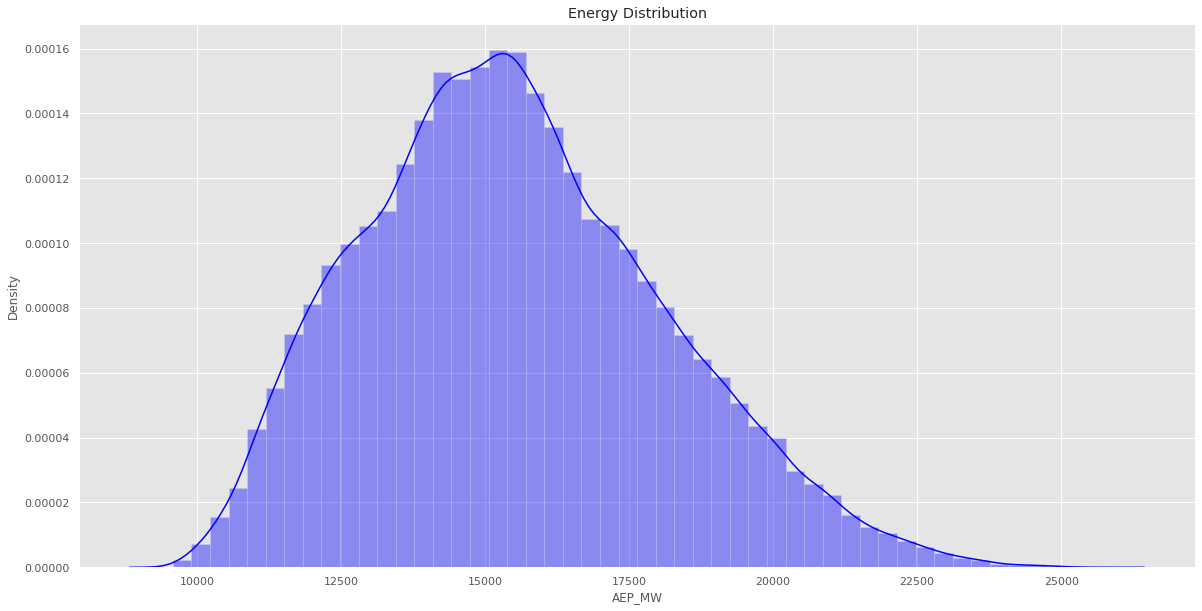

In [19]:
sns.distplot(dataset["AEP_MW"], color="blue")
plt.title("Energy Distribution")

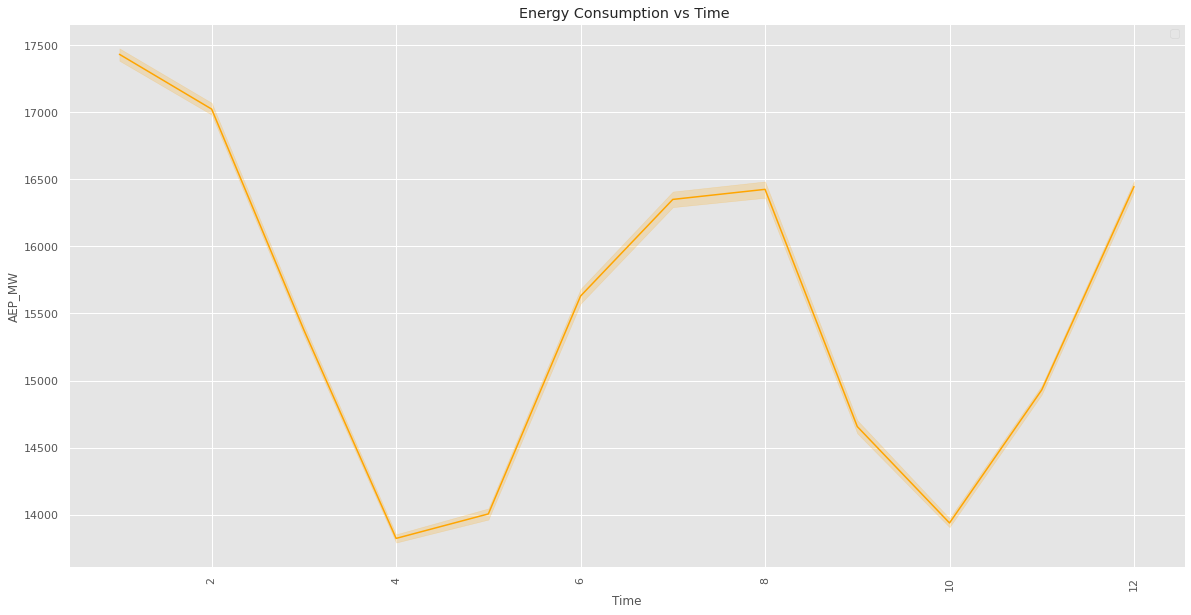

In [20]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x = df["Month"], y = df["AEP_MW"], data = df, color="orange")
# sns.relplot(data=df, x="Time", y="AEP_MW", kind="line")
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

# Resampleing Data

In [21]:
NewDataSet = dataset.resample('D').mean()

In [22]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape)

Old Dataset  (121273, 7)
New  Dataset  (5055, 4)


In [23]:
TestData = NewDataSet.tail(100)
Training_Set = NewDataSet.iloc[:,0:1]
Training_Set = Training_Set[:-60]

TestData,Training_Set,Training_Set

(                  AEP_MW  Month    Year  Week
 Datetime                                     
 2018-04-26  13157.791667    4.0  2018.0  17.0
 2018-04-27  12964.000000    4.0  2018.0  17.0
 2018-04-28  12237.583333    4.0  2018.0  17.0
 2018-04-29  12156.791667    4.0  2018.0  17.0
 2018-04-30  13443.500000    4.0  2018.0  18.0
 ...                  ...    ...     ...   ...
 2018-07-30  15368.083333    7.0  2018.0  31.0
 2018-07-31  15180.291667    7.0  2018.0  31.0
 2018-08-01  15151.166667    8.0  2018.0  31.0
 2018-08-02  15687.666667    8.0  2018.0  31.0
 2018-08-03  14809.000000    8.0  2018.0  31.0
 
 [100 rows x 4 columns],
                   AEP_MW
 Datetime                
 2004-10-01  14284.521739
 2004-10-02  12999.875000
 2004-10-03  12227.083333
 2004-10-04  14309.041667
 2004-10-05  14439.708333
 ...                  ...
 2018-05-31  16741.083333
 2018-06-01  15734.666667
 2018-06-02  14212.166667
 2018-06-03  13824.625000
 2018-06-04  14127.500000
 
 [4995 rows x 1 column

In [24]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


In [25]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)
Train

array([[0.27243207],
       [0.16328467],
       [0.09762599],
       ...,
       [0.26628457],
       [0.23335788],
       [0.25909104]])

In [26]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [27]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

# Creating the LSTM Model

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

regressor = Sequential()

# #Adding the first LSTM layer and some Dropout regularisation
# regressor.add(LSTM(units = 50, return_sequences=True, input_shape=(X_Train.shape[1], 1)))
# regressor.add(Dropout(0.2))

# #Adding a second layer of LSTM and some Dropout regularisation
# regressor.add(LSTM(units = 50, return_sequences=True))
# regressor.add(Dropout(0.2))

# #Adding a third layer of LSTM and some Dropout regularisation
# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))

# # Adding a fourth LSTM layer and some Dropout regularisation
# regressor.add(LSTM(units = 50))
# regressor.add(Dropout(0.2))

# #Adding the output layer
# regressor.add(Dense(units = 1))

# #Compiling the RNN
# regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor = Sequential()

regressor.add(LSTM(units=128, return_sequences=True, input_shape=(X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=128, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=128, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=128))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

adam = Adam(lr=0.001)
regressor.compile(optimizer=adam, loss='mean_squared_error')

regressor.fit(X_Train, Y_Train, epochs=100, batch_size=64)


Epoch 1/100
78/78 [==============================] - 37s 366ms/step - loss: 0.0296
Epoch 2/100
78/78 [==============================] - 28s 364ms/step - loss: 0.0177
Epoch 3/100
78/78 [==============================] - 28s 364ms/step - loss: 0.0175
Epoch 4/100
78/78 [==============================] - 28s 365ms/step - loss: 0.0166
Epoch 5/100
78/78 [==============================] - 29s 366ms/step - loss: 0.0162
Epoch 6/100
78/78 [==============================] - 29s 370ms/step - loss: 0.0155
Epoch 7/100
78/78 [==============================] - 29s 367ms/step - loss: 0.0152
Epoch 8/100
78/78 [==============================] - 28s 364ms/step - loss: 0.0150
Epoch 9/100
78/78 [==============================] - 28s 365ms/step - loss: 0.0145
Epoch 10/100
78/78 [==============================] - 28s 355ms/step - loss: 0.0128
Epoch 11/100
78/78 [==============================] - 28s 364ms/step - loss: 0.0105
Epoch 12/100
78/78 [==============================] - 28s 365ms/step - loss: 0.0097
E

In [29]:

TestData.head(5)

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4.0,2018.0,17.0
2018-04-27,12964.000000,4.0,2018.0,17.0
2018-04-28,12237.583333,4.0,2018.0,17.0
2018-04-29,12156.791667,4.0,2018.0,17.0
2018-04-30,13443.500000,4.0,2018.0,18.0


In [30]:
TestData.shape

(100, 4)

In [31]:
NewDataSet.shape

(5055, 4)

In [32]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [33]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_price = sc.inverse_transform(predicted_price)
predicted_price.shape

(100, 1)

In [34]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_price
dates = TestData.index.to_list()

# Error Metrics

In [35]:
mean_squared_error(y_true=True_MegaWatt, y_pred=Predicted_MegaWatt)

602573.6082870653

In [36]:
mean_absolute_error(y_true=True_MegaWatt, y_pred=Predicted_MegaWatt)

598.9184114583333

In [37]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [38]:
mean_absolute_percentage_error(y_true=True_MegaWatt, y_pred=Predicted_MegaWatt)

10.533188790618201

In [39]:
accuracy = r2_score(True_MegaWatt, Predicted_MegaWatt) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 73.07%


In [40]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

In [41]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,13372.697266
1,2018-04-27,12964.000000,12636.026367
2,2018-04-28,12237.583333,14563.004883
3,2018-04-29,12156.791667,13537.736328
4,2018-04-30,13443.500000,13162.718750
...,...,...,...
95,2018-07-30,15368.083333,15161.885742
96,2018-07-31,15180.291667,15341.821289
97,2018-08-01,15151.166667,14945.469727
98,2018-08-02,15687.666667,15231.243164


In [42]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

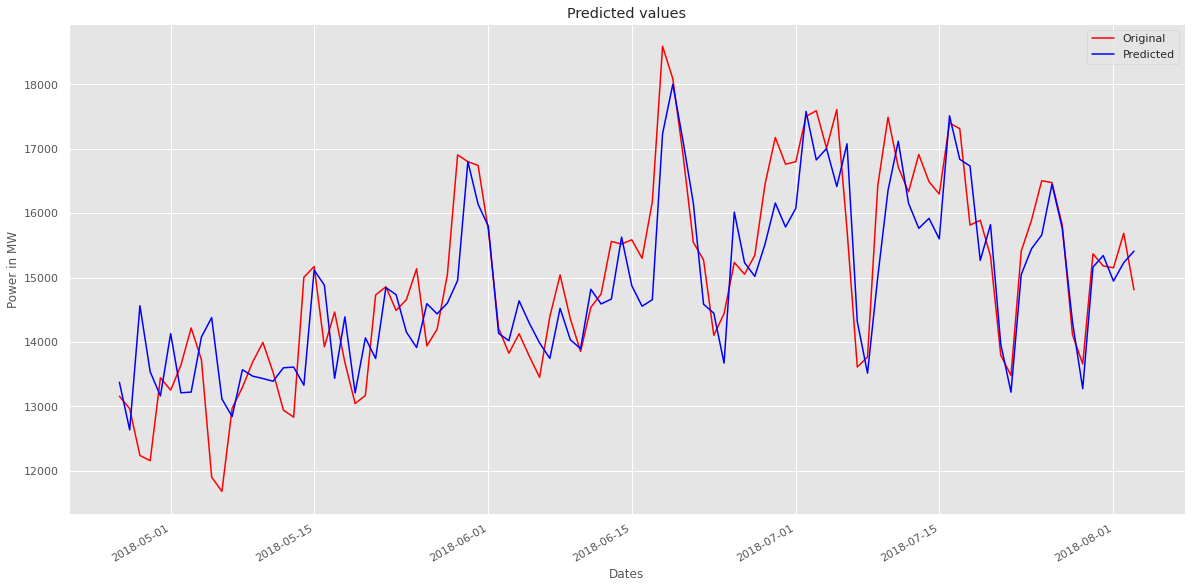

In [43]:
fig = plt.figure()
ax1= fig.add_subplot(111)
x = dates
y = True_MegaWatt
y1 = Predicted_MegaWatt
plt.plot(x,y, color="red", label = "Original")
plt.plot(x,y1, color="blue", label = "Predicted")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Predicted values")

plt.legend()